In [27]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [28]:
df = pd.read_csv('cancer-deaths-by-age.csv')

df.head(10)

,Entity,Code,Year,Under-5s (deaths),5-14 years old (deaths),15-49 years old (deaths),70+ years old (deaths),50-69 years old (deaths)
0,Afghanistan,AFG,1990,258.367519,164.605451,1736.068169,2953.903528,4948.929077
1,Afghanistan,AFG,1991,252.613202,161.218507,1754.071656,2990.651985,5012.778162
2,Afghanistan,AFG,1992,257.074124,175.344611,1949.137129,3040.262508,5170.549209
3,Afghanistan,AFG,1993,298.682199,201.223836,2184.653429,3096.441727,5345.643455
4,Afghanistan,AFG,1994,357.944962,214.236350,2270.545570,3155.386156,5479.824536
5,Afghanistan,AFG,1995,411.001115,228.684990,2315.231258,3195.516063,5560.840509
6,Afghanistan,AFG,1996,428.129031,235.749892,2376.104661,3237.850899,5621.040943
7,Afghanistan,AFG,1997,444.458163,252.263149,2447.697616,3284.505141,5680.598321
8,Afghanistan,AFG,1998,450.250236,270.590500,2507.618997,3330.129112,5724.917942
9,Afghanistan,AFG,1999,449.376436,286.242826,2547.125087,3395.108035,5757.606284


In [29]:
print(df.shape)

(6468, 8)


In [30]:
df.dtypes

Entity                       object
Code                         object
Year                          int64
Under-5s (deaths)           float64
5-14 years old (deaths)     float64
15-49 years old (deaths)    float64
70+ years old (deaths)      float64
50-69 years old (deaths)    float64
dtype: object

In [31]:
df = df.astype({'Under-5s (deaths)':'int64',
                '5-14 years old (deaths)':'int64',
                '15-49 years old (deaths)':'int64',
                '70+ years old (deaths)':'int64',
                '50-69 years old (deaths)':'int64'})

In [32]:
df.dtypes

Entity                      object
Code                        object
Year                         int64
Under-5s (deaths)            int64
5-14 years old (deaths)      int64
15-49 years old (deaths)     int64
70+ years old (deaths)       int64
50-69 years old (deaths)     int64
dtype: object

In [33]:
df.head(10)

,Entity,Code,Year,Under-5s (deaths),5-14 years old (deaths),15-49 years old (deaths),70+ years old (deaths),50-69 years old (deaths)
0,Afghanistan,AFG,1990,258,164,1736,2953,4948
1,Afghanistan,AFG,1991,252,161,1754,2990,5012
2,Afghanistan,AFG,1992,257,175,1949,3040,5170
3,Afghanistan,AFG,1993,298,201,2184,3096,5345
4,Afghanistan,AFG,1994,357,214,2270,3155,5479
5,Afghanistan,AFG,1995,411,228,2315,3195,5560
6,Afghanistan,AFG,1996,428,235,2376,3237,5621
7,Afghanistan,AFG,1997,444,252,2447,3284,5680
8,Afghanistan,AFG,1998,450,270,2507,3330,5724
9,Afghanistan,AFG,1999,449,286,2547,3395,5757


In [34]:
df_1 = df.groupby(['Year'], as_index=False).agg({'Under-5s (deaths)':'sum', 
                                                 '5-14 years old (deaths)':'sum', 
                                                 '15-49 years old (deaths)':'sum', 
                                                 '70+ years old (deaths)':'sum', 
                                                 '50-69 years old (deaths)':'sum'})

print(df_1.shape)

(28, 6)


In [35]:
df_1.head(10)

,Year,Under-5s (deaths),5-14 years old (deaths),15-49 years old (deaths),70+ years old (deaths),50-69 years old (deaths)
0,1990,328199,360014,4211886,10857914,12401327
1,1991,327262,370005,4313372,11174570,12598224
2,1992,323242,381762,4465803,11478143,12757353
3,1993,318403,388744,4619895,11874502,13003303
4,1994,312414,390199,4763726,12190336,13121699
5,1995,306102,395321,4903843,12549152,13157985
6,1996,300171,393438,4984707,12856601,13132095
7,1997,295050,389009,5029437,13193670,13122227
8,1998,288871,380230,5082843,13643966,13150255
9,1999,283305,371987,5137703,14100479,13290057


In [36]:
df_1 = pd.melt(df_1, 
               id_vars=['Year'], 
               var_name='Age',
               value_name='Total')

df_1.head(10)

,Year,Age,Total
0,1990,Under-5s (deaths),328199
1,1991,Under-5s (deaths),327262
2,1992,Under-5s (deaths),323242
3,1993,Under-5s (deaths),318403
4,1994,Under-5s (deaths),312414
5,1995,Under-5s (deaths),306102
6,1996,Under-5s (deaths),300171
7,1997,Under-5s (deaths),295050
8,1998,Under-5s (deaths),288871
9,1999,Under-5s (deaths),283305


In [37]:
print(df_1.shape)

(140, 3)


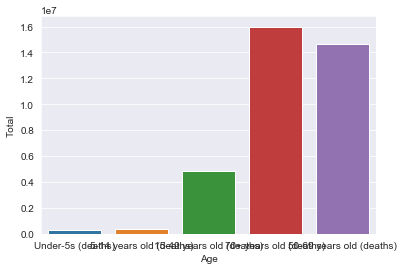

In [38]:
sns.barplot(x='Age', y='Total', data=df_1, ci=None)
plt.show()

In [40]:
df_1.to_csv('cleaned_cancer_and_aging.csv', index=None)